In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [36]:
df=pd.read_csv('GDP_Country.csv')


In [37]:
df.head(2)

,Country,Region,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [38]:
df.shape

(227, 20)

In [39]:
df['Country'].nunique()

227

In [40]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area_sqm                               0
Pop_Density_per sqm                    0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [41]:
df=df.set_index(['Country','Region'])

In [42]:
df.head(3)

,,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,Region,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298


In [43]:
df.shape

(227, 18)

In [44]:
df.isnull().sum()/len(df)*100

Population                            0.000000
Area_sqm                              0.000000
Pop_Density_per sqm                   0.000000
Coastline (coast/area ratio)          0.000000
Net migration                         1.321586
Infant mortality (per 1000 births)    1.321586
GDP ($ per capita)                    0.440529
Literacy (%)                          7.929515
Phones (per 1000)                     1.762115
Arable (%)                            0.881057
Crops (%)                             0.881057
Other (%)                             0.881057
Climate                               9.691630
Birthrate                             1.321586
Deathrate                             1.762115
Agriculture                           6.607930
Industry                              7.048458
Service                               6.607930
dtype: float64

In [45]:
from sklearn.impute import KNNImputer

In [46]:
knn_im=KNNImputer(n_neighbors=3)

In [47]:
knn_im.fit_transform(df)

array([[3.1056997e+07, 6.4750000e+05, 4.8000000e+01, ..., 3.8000000e-01,
        2.4000000e-01, 3.8000000e-01],
       [3.5816550e+06, 2.8748000e+04, 1.2460000e+02, ..., 2.3200000e-01,
        1.8800000e-01, 5.7900000e-01],
       [3.2930091e+07, 2.3817400e+06, 1.3800000e+01, ..., 1.0100000e-01,
        6.0000000e-01, 2.9800000e-01],
       ...,
       [2.1456188e+07, 5.2797000e+05, 4.0600000e+01, ..., 1.3500000e-01,
        4.7200000e-01, 3.9300000e-01],
       [1.1502010e+07, 7.5261400e+05, 1.5300000e+01, ..., 2.2000000e-01,
        2.9000000e-01, 4.8900000e-01],
       [1.2236805e+07, 3.9058000e+05, 3.1300000e+01, ..., 1.7900000e-01,
        2.4300000e-01, 5.7900000e-01]])

In [48]:
df_imputed=pd.DataFrame(knn_im.fit_transform(df),columns=df.columns)

In [49]:
df_imputed.isnull().sum()

Population                            0
Area_sqm                              0
Pop_Density_per sqm                   0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [ ]:
Pop : Categorical
    
    0:Very Low
    1:Low
    2:Avg
    3:high 
    4: Very High : GDP : Numerical Data (Label Encdoing)

In [ ]:
IN Knnimputer, to work
all the columns must be numeric

if you not set, Country and Region as index ()

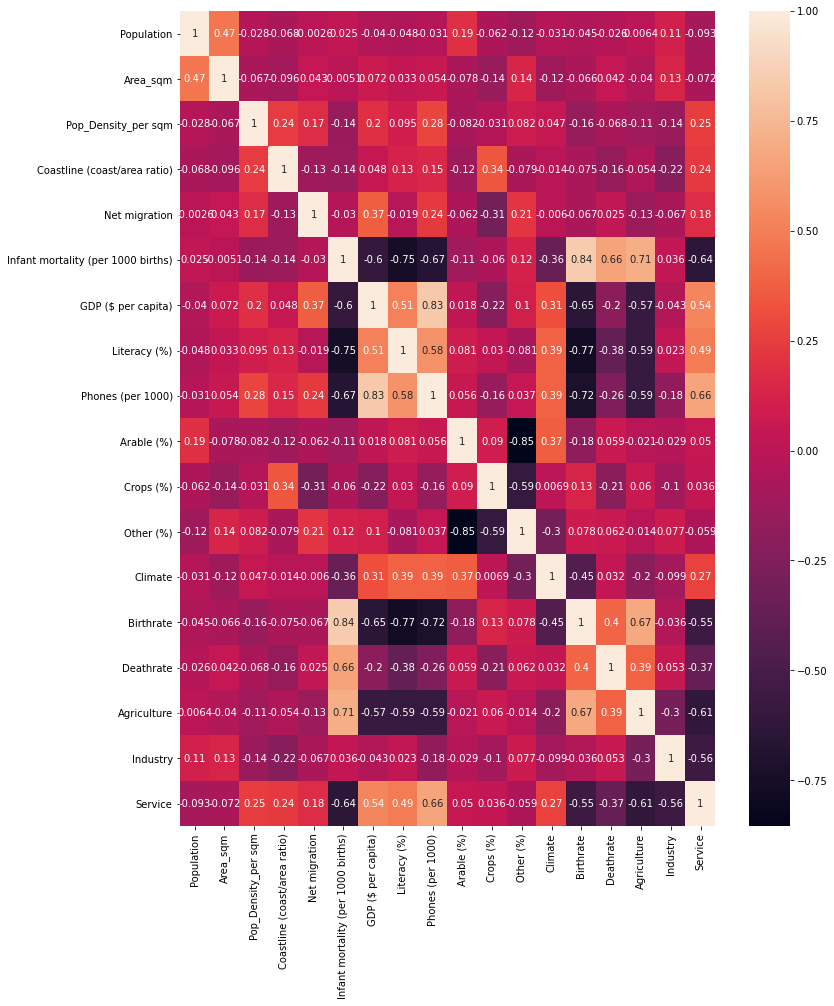

In [18]:
plt.figure(figsize=(12,15))
sns.heatmap(df_imputed.corr(),annot=True)

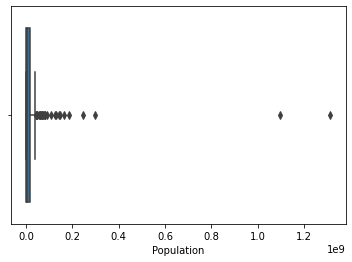

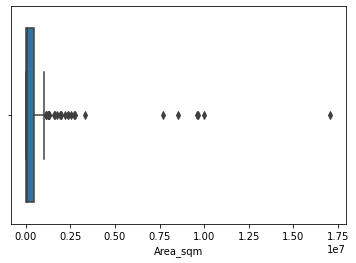

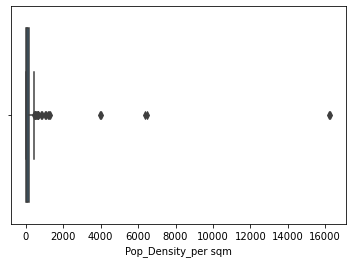

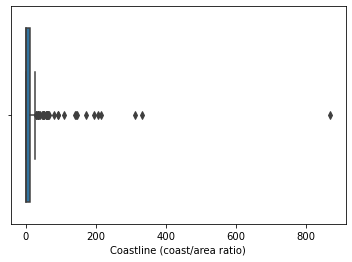

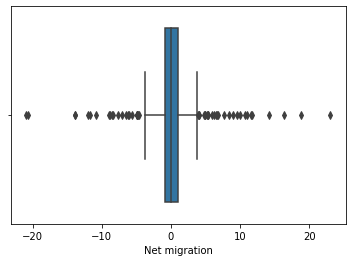

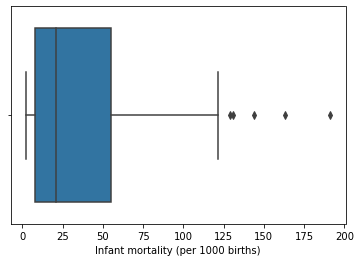

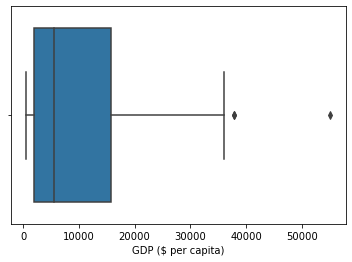

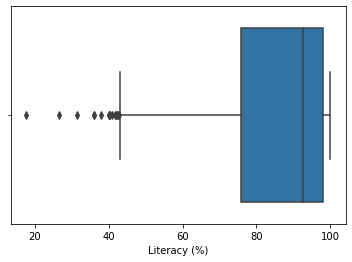

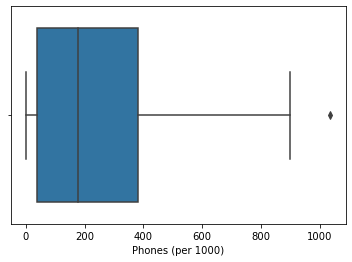

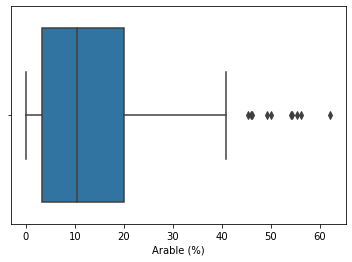

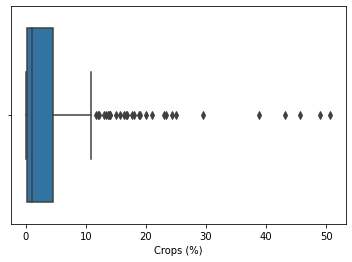

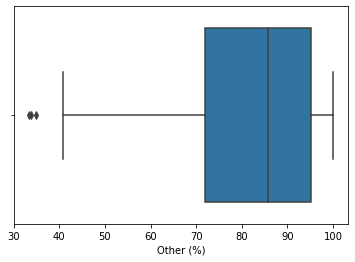

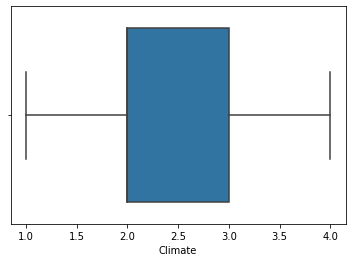

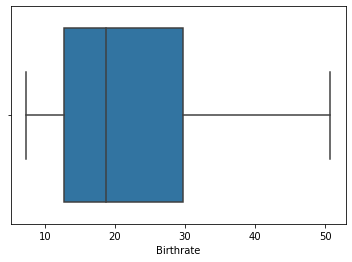

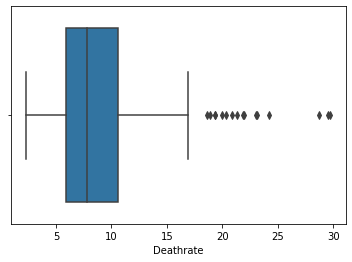

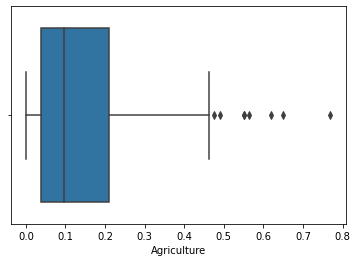

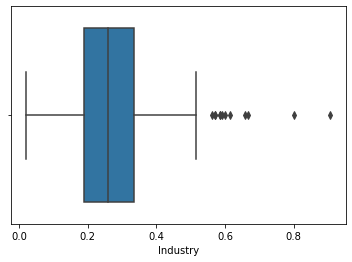

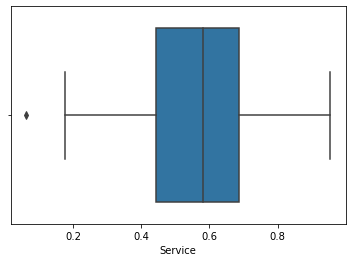

In [19]:
for i in df_imputed.columns:
    sns.boxplot(df_imputed[i])
    plt.show()

In [ ]:
If we use here IQR:
    
1.5*IQR,, remove them, or you cap

Reduce the skewness, by applying Transformations :
    
    if skewness of Residuals is very high, we go with Transformation ()  : Normality Assumption

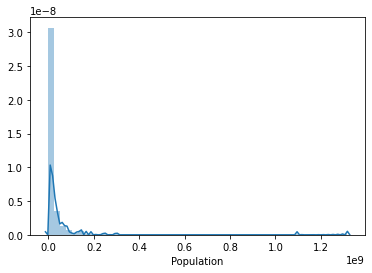

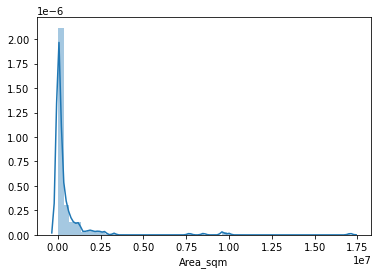

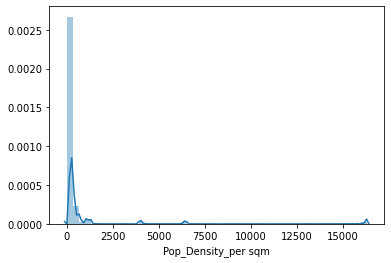

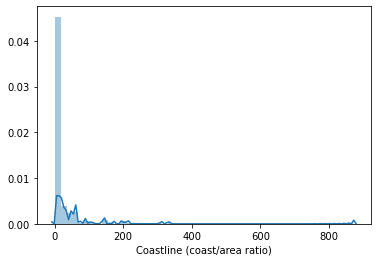

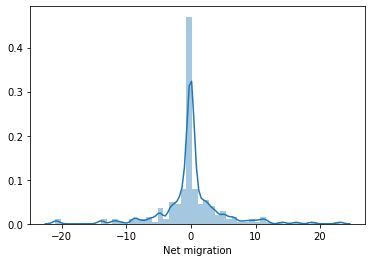

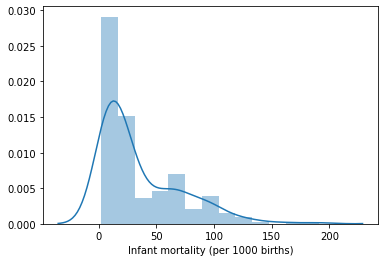

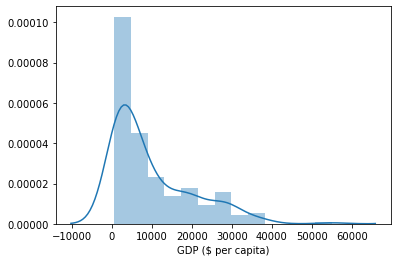

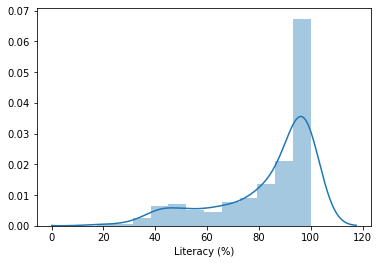

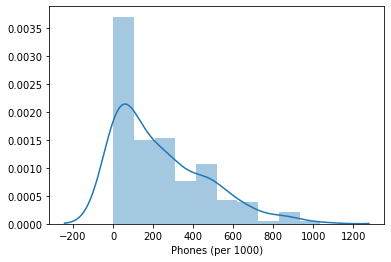

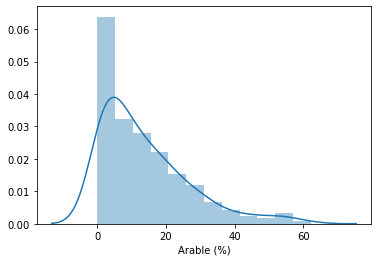

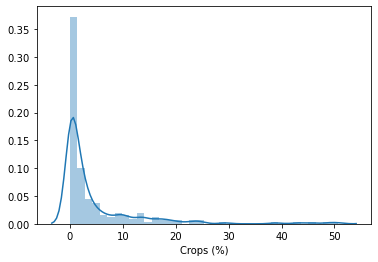

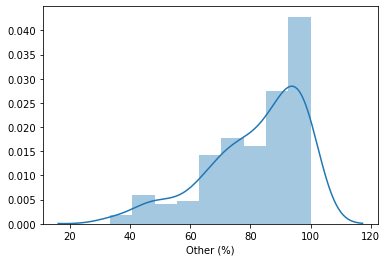

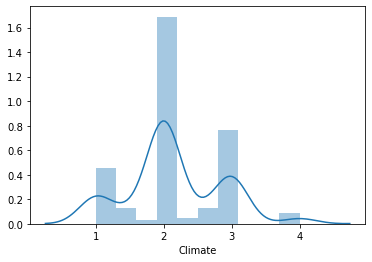

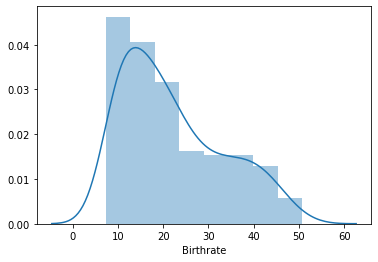

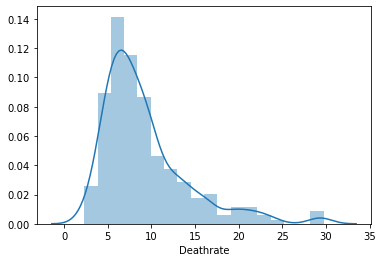

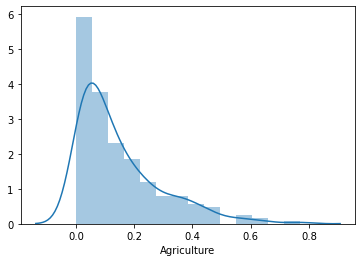

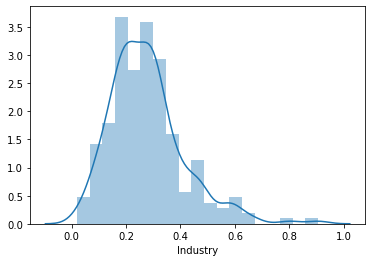

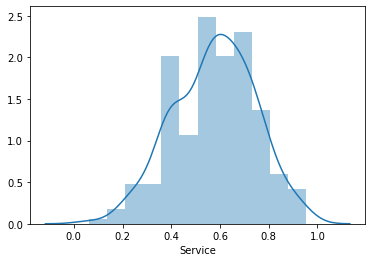

In [24]:
for i in df_wm.columns:
    sns.distplot(df_wm[i])
    plt.show()
    print(df_wm[i].skew())

In [50]:
df=df_imputed

In [17]:
df.columns

Index(['Population', 'Area_sqm', 'Pop_Density_per sqm',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [59]:
df_cpy=df.copy()
df_cpy.columns

Index(['Population', 'Area_sqm', 'Pop_Density_per sqm',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [60]:
df_cpy['GDP ($ per capita)']=np.log(df_cpy['GDP ($ per capita)'])  # Log Transformation Target Variable

In [61]:
df_cpy['Pop_Density_per sqm']=np.sqrt(df_cpy['Pop_Density_per sqm'])

In [62]:
df_cpy['Population']=np.log(df_cpy['Population'])

In [63]:
model_v4: 

GDP(y): log Transformed (Target)
Population : log Transformed ()
Pop Density per sq metr:  Sqrt Transformed
model_v4

SyntaxError: invalid syntax (<ipython-input-63-8b0de1998eec>, line 1)

In [64]:
df_cpy.columns

Index(['Population', 'Area_sqm', 'Pop_Density_per sqm',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [65]:
X=df_cpy.drop(['Coastline (coast/area ratio)','Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],axis=1)

In [66]:
y=df_cpy['GDP ($ per capita)']

In [67]:
X.shape

(227, 5)

In [68]:
y.shape

(227,)

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [70]:
# Data Leakage
Test Data is getting Leaked ( to the model), Model shouldn't know my Test Data/ untouched

SyntaxError: invalid syntax (<ipython-input-70-1b7f9b840a98>, line 2)

In [71]:
sc=StandardScaler()
X_train_sc=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [72]:
lin_reg=LinearRegression()


In [73]:
model=lin_reg.fit(X_train_sc,y_train)
# R2 and RMSE

In [74]:
r2_score(y_train, model.predict(X_train_sc))  # R2 of Train

0.5348287406553661

In [75]:
r2_score(y_test, model.predict(X_test_sc))  # R2 of Test

0.4065193897271573

In [76]:
import pickle

In [77]:
pickle.dump(lin_reg,open('model.pkl','wb'))